In [12]:
#imports
import matplotlib.pyplot as plt
import pandas as pds
import geopandas as gpds

In [2]:
#Read shapefile

wa_cbg = gpds.read_file("saep_bg10.shp")

In [3]:
#Step 1: Adding Columns, identify block groups as urban or rural.

#inserting new, empty columns
wa_cbg['dens'] = None
wa_cbg['Urban_Rural'] = None

#from Metadata of saep bg10 - ALANDMI = 2010 Census Land area (square miles)
#from Metadata of saep_bg10 - POP2018 = SAEP Estimated Total Population 2018

#showing data frame to ensure columns were added correctly
#.head shows first 5 rows, but did not show ALANDMI and POP2018 columns
wa_cbg.head()

#testing to show ALANDMI and POP2018 specifically
df_test = wa_cbg[['ALANDMI', 'POP2018', 'dens', 'Urban_Rural']]

df_test

#Calculations
#had to add if statement to remove ZeroDivisonError
for index, row in wa_cbg.iterrows():
    if row['ALANDMI'] == 0:
        wa_cbg.loc[index, 'dens'] = 0
    else:
        wa_cbg.loc[index, 'dens'] = (row['POP2018']/row['ALANDMI'])

for index, row in wa_cbg.iterrows():
    if row['dens'] >= 1000: #per sq mile
        wa_cbg.loc[index, 'Urban_Rural'] = 'Urban'
    else:
        wa_cbg.loc[index, 'Urban_Rural'] = 'Rural'
        
#first try received ZeroDivisionError, had to add if statement to remove any zero division

print wa_cbg[['ALANDMI', 'POP2018', 'dens', 'Urban_Rural']]


       ALANDMI   POP2018      dens Urban_Rural
0      616.711   783.791   1.27092       Rural
1        3.774  1146.257   303.725       Rural
2        3.236   555.478   171.656       Rural
3      417.409   420.051   1.00633       Rural
4      135.972   707.054       5.2       Rural
5      461.878   620.353   1.34311       Rural
6        4.763  2046.913   429.753       Rural
7      164.733  1309.365   7.94841       Rural
8       66.782  1423.689   21.3185       Rural
9       41.106  1138.723   27.7021       Rural
10       2.519  1356.963   538.691       Rural
11       0.323  1308.087    4049.8       Urban
12       0.988  1824.879   1847.04       Urban
13       3.452  2409.738    698.07       Rural
14       1.330  2968.659   2232.07       Urban
15     185.542  1447.847   7.80334       Rural
16     320.618   821.095   2.56098       Rural
17      11.314  2280.965   201.606       Rural
18       1.449  1123.780   775.556       Rural
19       0.387  1095.111   2829.74       Urban
20       1.17

In [4]:
#Step 2 - What percentage of the population of the state is urbanized, most recent year(2018)

#2 variables
UrbanPop = 0
pop_sum = wa_cbg.POP2018.sum()

for index, row in wa_cbg.iterrows():
    if row['Urban_Rural'] == 'Urban':
        UrbanPop = UrbanPop + wa_cbg.loc[index, 'POP2018']
    
print "In 2018, the percentage of Washington State's population that is urbanized is approximately " + str(round(UrbanPop / pop_sum * 100, 2)) + "%."

In 2018, the percentage of Washington State's population that is urbanized is approximately 73.06%.


In [5]:
#Step 3 - What percentage of the land area of the state is urbanized
#Similar to step 2, just using land variables
UrbanLand = 0
land_sum = wa_cbg.ALANDMI.sum()

for index, row in wa_cbg.iterrows():
    if row['Urban_Rural'] == 'Urban':
        UrbanLand = UrbanLand + wa_cbg.loc[index, 'ALANDMI']

print "In 2018, the percentage of Washington State's land that is urbanized is " + str(round(UrbanLand / land_sum * 100, 2)) + "%."

In 2018, the percentage of Washington State's land that is urbanized is 2.28%.


In [6]:
#Step 4 - Add column showing whether block groups have urbanized, no change, or deurbanized over the previous decade ('08-'18)
#must show as string, not in terms of numerical change, can calculate this by showing Urban_Rural columns for 2008 and comparing to 2018

#repeating step 1 for 2008, good reminder that I should make variables/column names as specific as possible, now dealing with a dens, and 2008_dens column


wa_cbg['08_dens'] = None
wa_cbg['08_Urban_Rural'] = None

for index, row in wa_cbg.iterrows():
    if row['ALANDMI'] == 0:
        wa_cbg.loc[index, '08_dens'] = 0
    else:
        wa_cbg.loc[index, '08_dens'] = (row['POP2008'] / row['ALANDMI'])
        
wa_cbg.head() #checking if new columns exist

for index, row in wa_cbg.iterrows():
    if row['08_dens'] >= 1000:
        wa_cbg.loc[index, '08_Urban_Rural'] = 'Urban'
    else:
        wa_cbg.loc[index, '08_Urban_Rural'] = 'Rural'

print wa_cbg[['ALANDMI', 'POP2008', '08_dens', '08_Urban_Rural']]

       ALANDMI   POP2008   08_dens 08_Urban_Rural
0      616.711   735.669   1.19289          Rural
1        3.774  1163.429   308.275          Rural
2        3.236   560.773   173.292          Rural
3      417.409   454.080   1.08785          Rural
4      135.972   724.901   5.33125          Rural
5      461.878   584.705   1.26593          Rural
6        4.763  1844.450   387.245          Rural
7      164.733  1245.989   7.56369          Rural
8       66.782  1311.997    19.646          Rural
9       41.106  1017.254   24.7471          Rural
10       2.519  1284.279   509.837          Rural
11       0.323  1190.347   3685.28          Urban
12       0.988  1611.133    1630.7          Urban
13       3.452  2039.884   590.928          Rural
14       1.330  2445.110   1838.43          Urban
15     185.542  1336.262   7.20194          Rural
16     320.618   770.880   2.40436          Rural
17      11.314  2111.971   186.669          Rural
18       1.449  1095.794   756.242          Rural


In [7]:
#Step 4 - new '08-'18 change in urbanization column + comparing Urban_Rural from 08 and 18

#creating change column
wa_cbg['urban_change'] = None

for index, row in wa_cbg.iterrows():
    
    if row['08_Urban_Rural'] == row['Urban_Rural']:
        wa_cbg.loc[index, 'urban_change'] = 'no change in category'
    elif row['08_Urban_Rural'] == 'Urban' and row['Urban_Rural'] == 'Rural':
        wa_cbg.loc[index, 'urban_change'] = 'de-urbanized'
    elif row['08_Urban_Rural'] == 'Rural' and row['Urban_Rural'] == 'Urban':
        wa_cbg.loc[index, 'urban_change'] = 'urbanized'

print wa_cbg['urban_change'] #testing df

0       no change in category
1       no change in category
2       no change in category
3       no change in category
4       no change in category
5       no change in category
6       no change in category
7       no change in category
8       no change in category
9       no change in category
10      no change in category
11      no change in category
12      no change in category
13      no change in category
14      no change in category
15      no change in category
16      no change in category
17      no change in category
18      no change in category
19      no change in category
20      no change in category
21      no change in category
22      no change in category
23      no change in category
24      no change in category
25      no change in category
26      no change in category
27      no change in category
28      no change in category
29      no change in category
                ...          
4753    no change in category
4754    no change in category
4755    no

In [8]:
#Step 5 - how many block groups urbanized and how many deurbanized between '08 - '18
#variables for 
wa_urbanized = (wa_cbg['urban_change'] == 'urbanized').sum()
wa_deurbanized = (wa_cbg['urban_change'] == 'de-urbanized').sum()

print str(wa_urbanized) + " block groups have urbanized over the decade between 2008 and 2018, while " + str(wa_deurbanized) + " block groups have deurbanized in the same time frame."


65 block groups have urbanized over the decade between 2008 and 2018, while 2 block groups have deurbanized in the same time frame.


Index([     u'STATEFP10',     u'COUNTYFP10',      u'TRACTCE10',
           u'BLKGRPCE10',        u'GEOID10',     u'NAMELSAD10',
              u'MTFCC10',     u'FUNCSTAT10',     u'INTPTLON10',
           u'INTPTLAT10',
       ...
            u'COHU00_10',     u'PCOHU00_10',      u'COHU10_18',
           u'PCOHU10_18',       u'geometry',           u'dens',
          u'Urban_Rural',        u'08_dens', u'08_Urban_Rural',
         u'urban_change'],
      dtype='object', length=136)


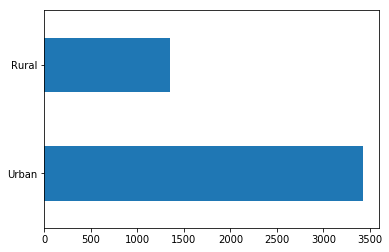

In [29]:
#Step 6 - Creating plot using 2008 and 2018 urban data
print(wa_cbg.columns)
wa_cbg.head(2)

wa_cbg['Urban_Rural'].head(5)

wa_cbg['Urban_Rural'].value_counts().plot(kind='barh')

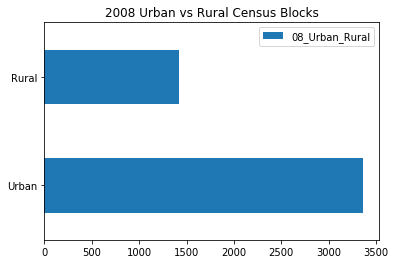

In [43]:

wa_cbg['08_Urban_Rural'].value_counts().plot(kind='barh', title="2008 Urban vs Rural Census Blocks", legend=True)


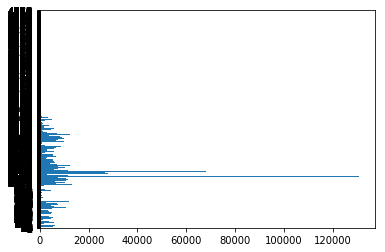